Validate our predictions in a given year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fantasy Toolz scrapers
import mlbstatscraping as mss


In [19]:
year = '2025'

In [20]:
# Get the data
HittingDF = mss.get_fangraphs_data('hitting',[year])
PitchingDF = mss.get_fangraphs_data('pitching',[year])

In [21]:
# Get the predictions
HittingDFP = pd.read_csv('../predictions/2025/batter_predictions_{}.csv'.format(year))
PitchingDFP = pd.read_csv('../predictions/2025/pitcher_predictions_{}.csv'.format(year))

# Fix names by stripping trailing spaces
HittingDFP['Name'] = HittingDFP['Name'].str.rstrip()
PitchingDFP['Name'] = PitchingDFP['Name'].str.rstrip()

# Merge actuals with predictions
AllHitting = pd.merge(HittingDFP, HittingDF, how='inner', left_on=['Name'], right_on=['Name'])
AllPitching = pd.merge(PitchingDFP, PitchingDF, how='inner', left_on=['Name'], right_on=['Name'])

# now _x is predicted, _y is actual

In [25]:
AllHitting[AllHitting['Name']=='Geraldo Perdomo']

,Name,PA_x,AVG_x,eAVG,HR_x,eHR,R_x,eR,RBI_x,eRBI,...,IBB,SO,HBP,SF,SH,GDP,SB_y,CS,AVG_y,Year
171,Geraldo Perdomo,466,0.254,0.036,5,6,62,17,41,13,...,1.0,83.0,10.0,11.0,8.0,11.0,27.0,6.0,0.29,2025


In [ ]:
# Create 2D histogram

for stat in ['PA']:
    hist, xedges, yedges = np.histogram2d(AllHitting['{}_y'.format(stat)], AllHitting['{}_y'.format(stat)]-AllHitting['{}_x'.format(stat)], bins=20)

    # Plot the 2D histogram
    plt.figure()
    plt.imshow(np.log10(hist.T+1.), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
            cmap='Greys', aspect='auto')
    plt.colorbar(label='Count')

    plt.xlabel('2025 {}'.format(stat))
    plt.ylabel('Delta {} (Actual-Predicted)'.format(stat))


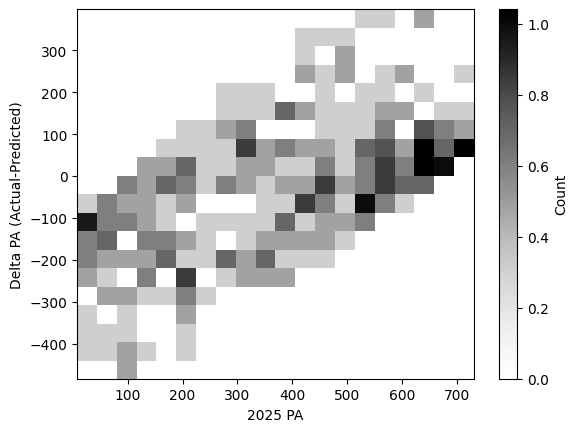

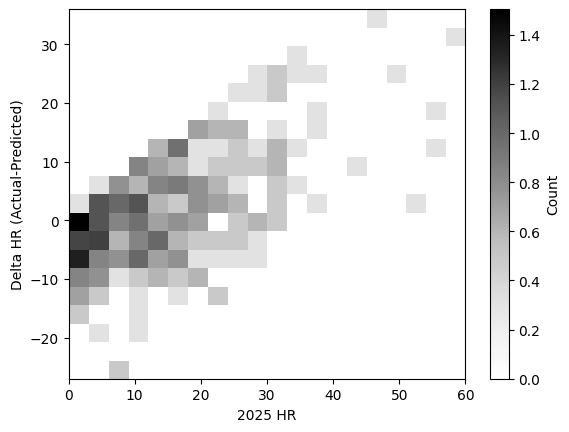

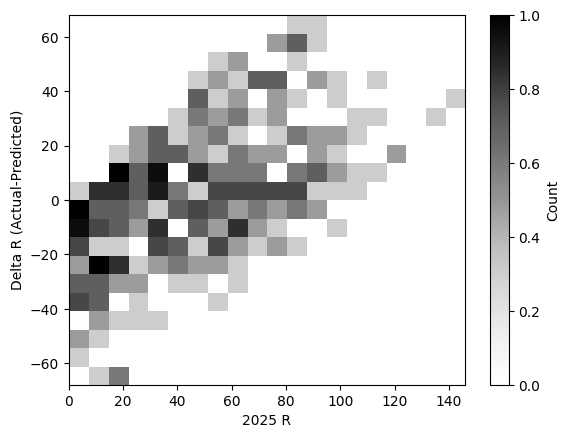

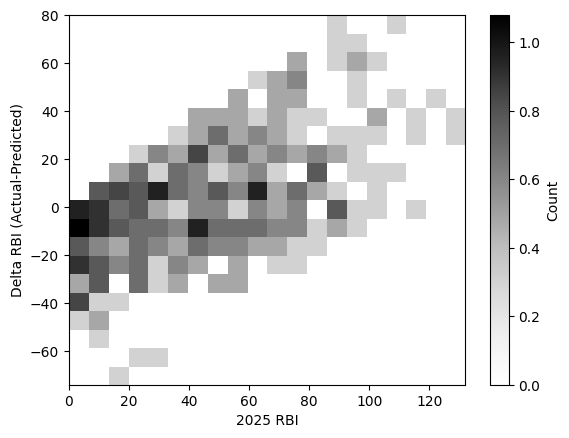

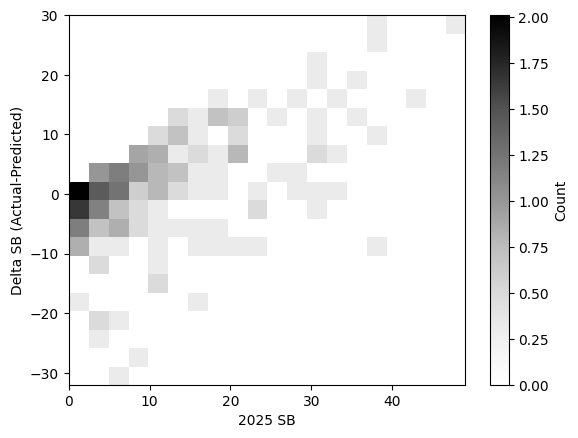

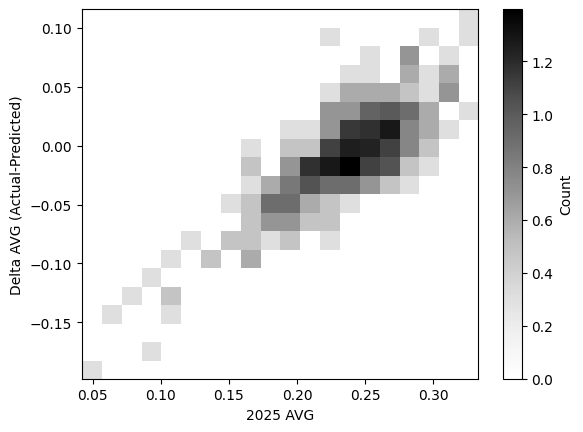

In [6]:
# Create 2D histogram

for stat in ['PA','HR','R','RBI','SB','AVG']:
    hist, xedges, yedges = np.histogram2d(AllHitting['{}_y'.format(stat)], AllHitting['{}_y'.format(stat)]-AllHitting['{}_x'.format(stat)], bins=20)

    # Plot the 2D histogram
    plt.figure()
    plt.imshow(np.log10(hist.T+1.), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
            cmap='Greys', aspect='auto')
    plt.colorbar(label='Count')

    plt.xlabel('2025 {}'.format(stat))
    plt.ylabel('Delta {} (Actual-Predicted)'.format(stat))


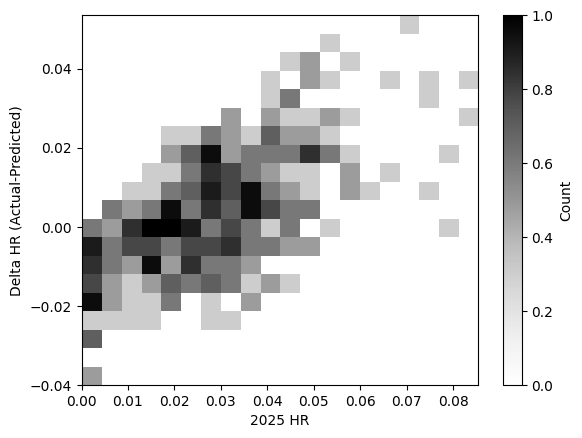

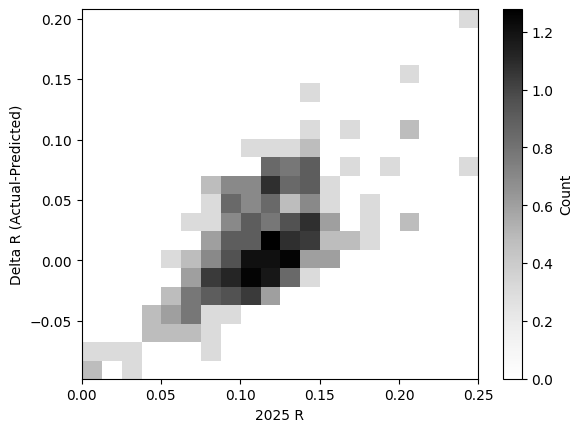

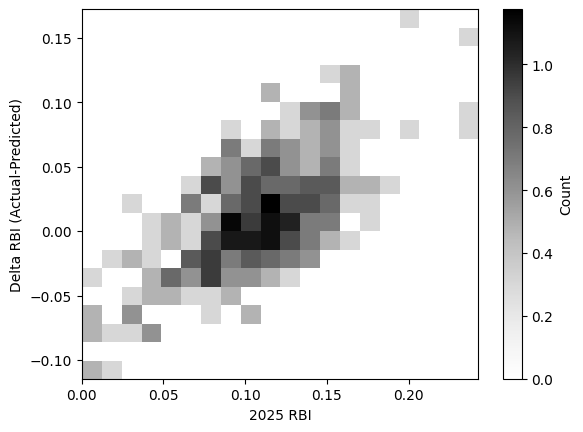

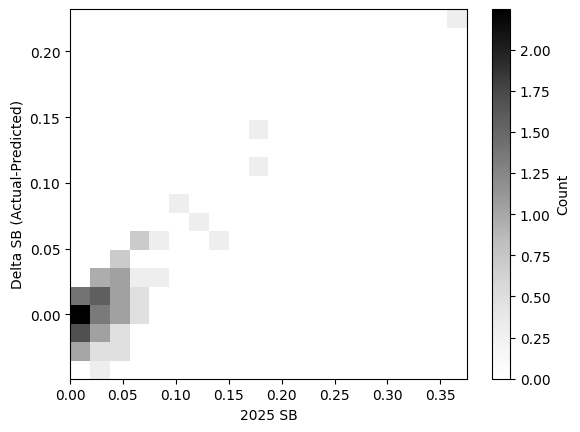

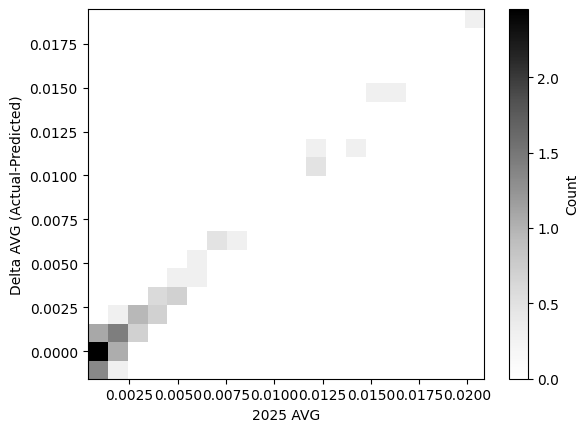

In [8]:
# Create 2D histogram

for stat in ['HR','R','RBI','SB','AVG']:
    hist, xedges, yedges = np.histogram2d(AllHitting['{}_y'.format(stat)].astype('float')/AllHitting['PA_y'], AllHitting['{}_y'.format(stat)]/AllHitting['PA_y']-AllHitting['{}_x'.format(stat)]/AllHitting['PA_x'], bins=20)

    # Plot the 2D histogram
    plt.figure()
    plt.imshow(np.log10(hist.T+1.), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
            cmap='Greys', aspect='auto')
    plt.colorbar(label='Count')

    plt.xlabel('2025 {}'.format(stat))
    plt.ylabel('Delta {} (Actual-Predicted)'.format(stat))


In [16]:
AllPitching.keys()

Index(['Name', 'IP_x', 'SO_x', 'eSO', 'ERA_x', 'eERA', 'WHIP', 'eWHIP', 'W_x',
       'eW', 'S', 'eS', 'Rank', 'Unnamed: 13', '#', 'Team', 'W_y', 'L',
       'ERA_y', 'G', 'GS', 'CG', 'ShO', 'SV', 'HLD', 'BS', 'IP_y', 'TBF', 'H',
       'R', 'ER', 'HR', 'BB', 'IBB', 'HBP', 'WP', 'BK', 'SO_y', 'Year', 'K_y'],
      dtype='object')

In [17]:
AllPitching['K_y'] = AllPitching['SO_y']
AllPitching['SV_y'] = AllPitching['S']
AllPitching['SV_x'] = AllPitching['SV']

KeyError: 'WHIP_y'

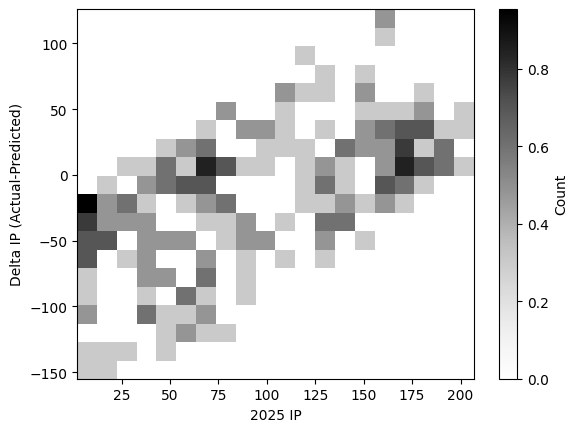

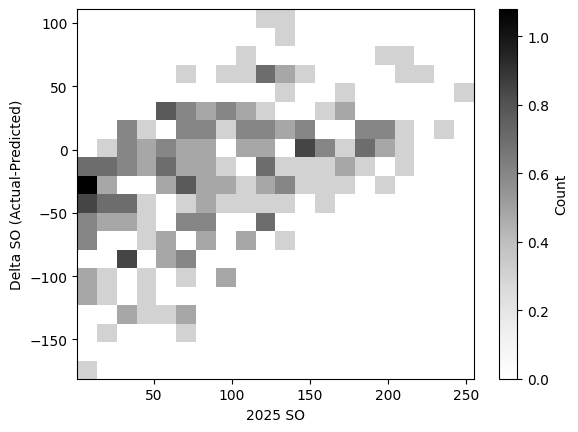

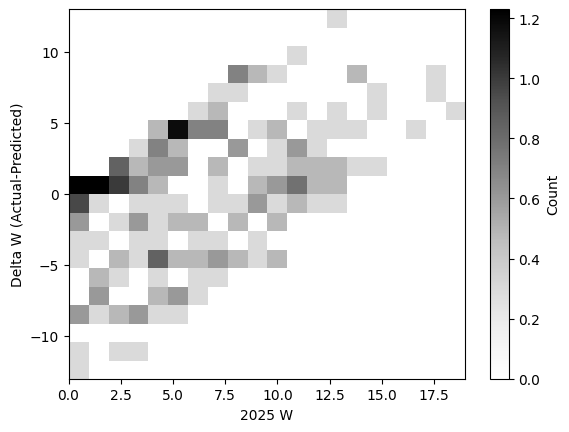

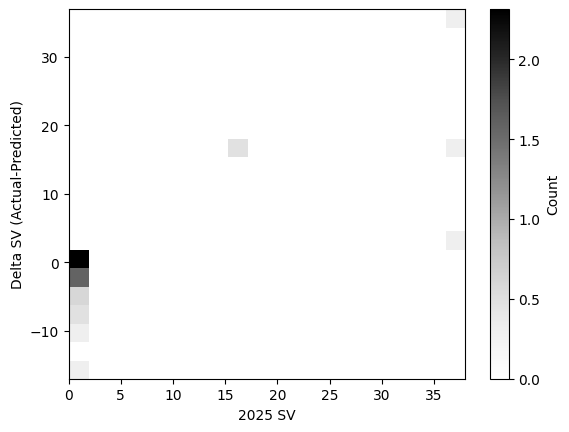

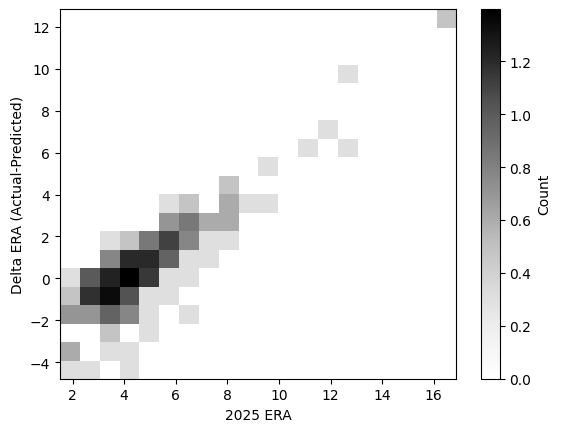

In [18]:

# Create 2D histogram

for stat in ['IP','SO','W','SV','ERA','WHIP']:
    hist, xedges, yedges = np.histogram2d(AllPitching['{}_y'.format(stat)], AllPitching['{}_y'.format(stat)]-AllPitching['{}_x'.format(stat)], bins=20)

    # Plot the 2D histogram
    plt.figure()
    plt.imshow(np.log10(hist.T+1.), origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
            cmap='Greys', aspect='auto')
    plt.colorbar(label='Count')

    plt.xlabel('2025 {}'.format(stat))
    plt.ylabel('Delta {} (Actual-Predicted)'.format(stat))


In [19]:
AllPitching

,Name,IP_x,SO_x,eSO,ERA_x,eERA,WHIP,eWHIP,W_x,eW,...,R,ER,HR,BB,IBB,HBP,WP,BK,SO_y,Year
0,Tarik Skubal,190,224,14,2.84,0.43,0.99,0.26,14,7,...,55.0,48.0,18.0,33.0,0.0,5.0,3.0,2.0,241.0,2025
1,Paul Skenes,171,216,22,2.16,1.37,0.96,0.20,15,4,...,45.0,41.0,11.0,42.0,0.0,6.0,2.0,0.0,216.0,2025
2,Zack Wheeler,197,220,14,2.97,0.41,1.03,0.19,14,8,...,48.0,45.0,19.0,33.0,0.0,8.0,2.0,0.0,195.0,2025
3,Corbin Burnes,188,192,14,2.97,0.38,1.06,0.12,14,8,...,23.0,19.0,7.0,26.0,1.0,3.0,1.0,2.0,63.0,2025
4,Chris Sale,171,211,18,3.05,0.40,1.08,0.23,13,7,...,38.0,36.0,11.0,32.0,0.0,11.0,3.0,0.0,165.0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Roddery Munoz,29,24,4,6.52,1.42,1.52,0.46,0,50,...,10.0,10.0,4.0,9.0,0.0,0.0,1.0,0.0,14.0,2025
250,Bradley Blalock,35,24,9,5.91,1.23,1.74,0.57,0,20,...,61.0,61.0,17.0,23.0,1.0,3.0,2.0,0.0,27.0,2025
251,Tanner Gordon,33,26,6,8.45,1.52,1.76,0.83,0,43,...,60.0,53.0,16.0,17.0,0.0,3.0,1.0,1.0,62.0,2025
252,Tommy Henry,25,19,4,5.76,1.44,1.56,0.41,0,76,...,3.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0,8.0,2025
